# **Check for GPU**

Let's make sure that we have access to GPU. We are going to use nvidia-smi command to do that.

In [1]:
!nvidia-smi

Wed Feb  7 15:48:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# **Checking for current directory**

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


# YOLOv8 Installation

In [3]:
!pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 4.5 MB/s eta 0:00:00


In [4]:
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display,Image

# **Custom Dataset**

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="27oEXLEzPQ8cQJje4Evu")
project = rf.workspace("traffic-watch").project("the-traffic-watch")
dataset = project.version(2).download("yolov8")




/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
loading Roboflo


Extracting Dataset Version Zip to The-Traffic-Watch-2 in yolov8:: 100%|██████████| 3884/3884 [00:00<00:00, 5131.65it/s]


# **Custom Training**

In [9]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=1024

/content
100% 22.8M/22.8M [00:00<00:00, 168MB/s]
New https://pypi.org/project/ultralytics/8.1.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/The-Traffic-Watch-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=

In [11]:
!ls {HOME}/runs/segment/train/

args.yaml					    labels_correlogram.jpg  weights
events.out.tfevents.1707321171.56b7761fda37.2364.0  labels.jpg


In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/segment/train/confusion_matrix.png'

/content


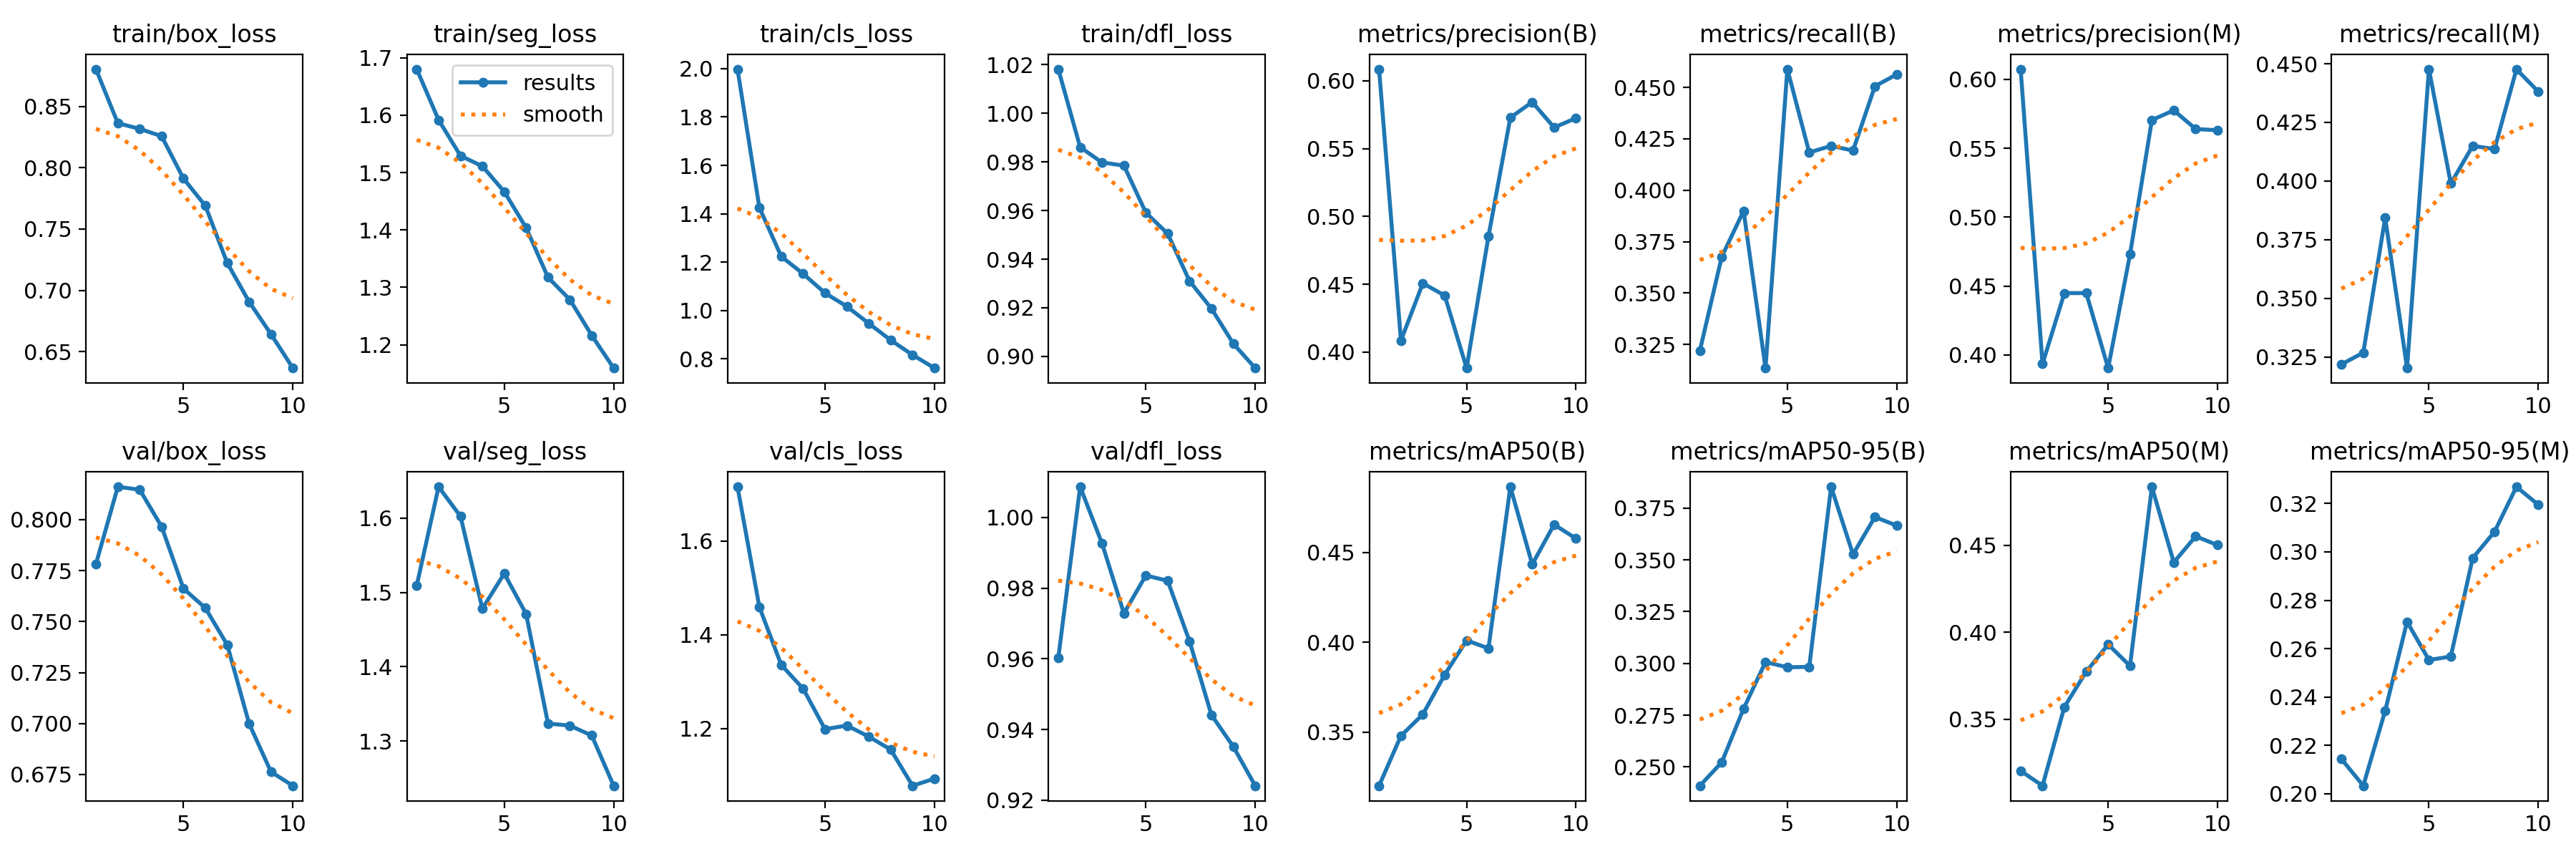

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


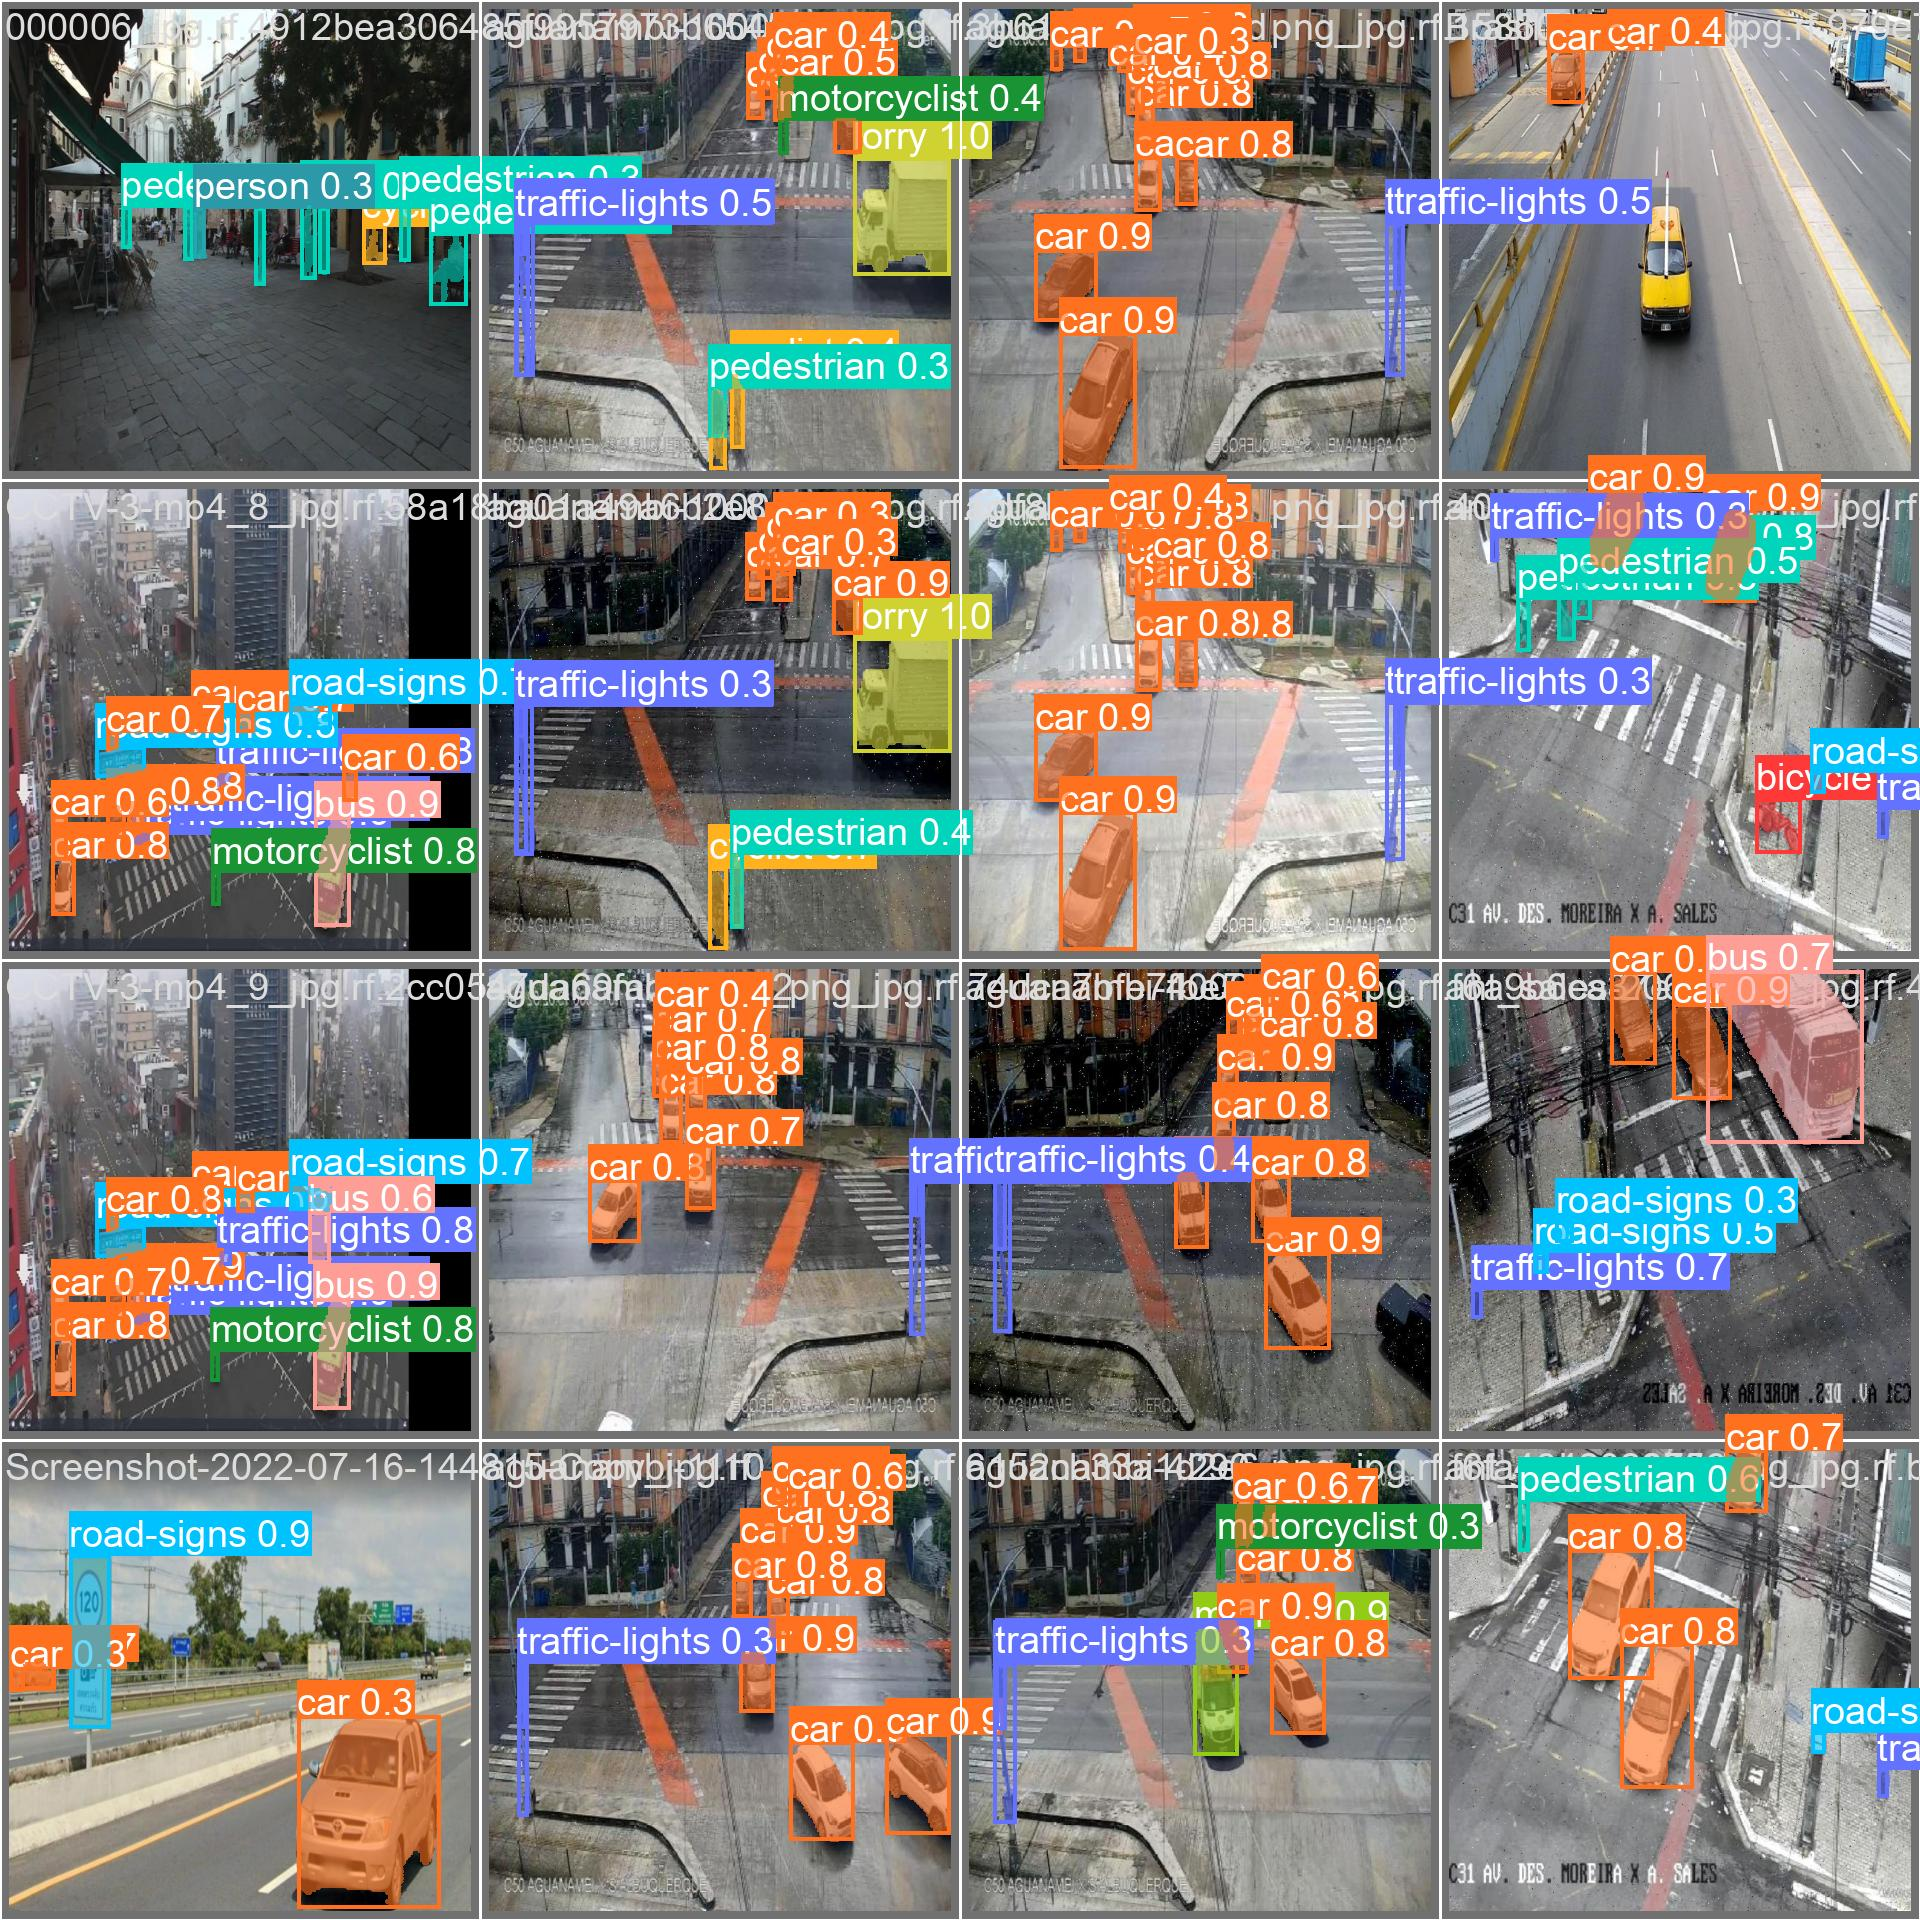

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=1000)

# **Validate Custom Model**

In [13]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 420, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 97, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 149, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 628, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 567, in torch_safe_load
    return torch.load(file, map_location='cpu'), file  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 986, in load
    with _open_file_like(f, 'rb') 

# **Inference with Custom Model**

In [25]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27230490 parameters, 0 gradients, 110.0 GFLOPs

image 1/118 /content/datasets/The-Traffic-Watch-2/test/images/000005_jpg.rf.92512116ba29621457c546a3624964ec.jpg: 800x800 1 cyclist, 8 pedestrians, 69.5ms
image 2/118 /content/datasets/The-Traffic-Watch-2/test/images/000007_jpg.rf.b3085a8d1488117608b1a3aab922a5f1.jpg: 800x800 1 cyclist, 7 pedestrians, 1 person, 57.5ms
image 3/118 /content/datasets/The-Traffic-Watch-2/test/images/0dc6d85a2ba0a534-Copy_jpg.rf.eca55b8c1768063605fc8b09021d1cce.jpg: 800x800 4 cars, 1 motorcyclist, 57.3ms
image 4/118 /content/datasets/The-Traffic-Watch-2/test/images/Brasil1_mp4-22_jpg.rf.aa167f3e429f156086a21ae758608a85.jpg: 800x800 1 bus, 57.4ms
image 5/118 /content/datasets/The-Traffic-Watch-2/test/images/Brasil1_mp4-34_jpg.rf.6dfdeabaeccca9b37f1f73d11d815c0a.jpg: 800x800 1 car, 1 motorcycle, 38.7ms
image 6/118 /content/dat

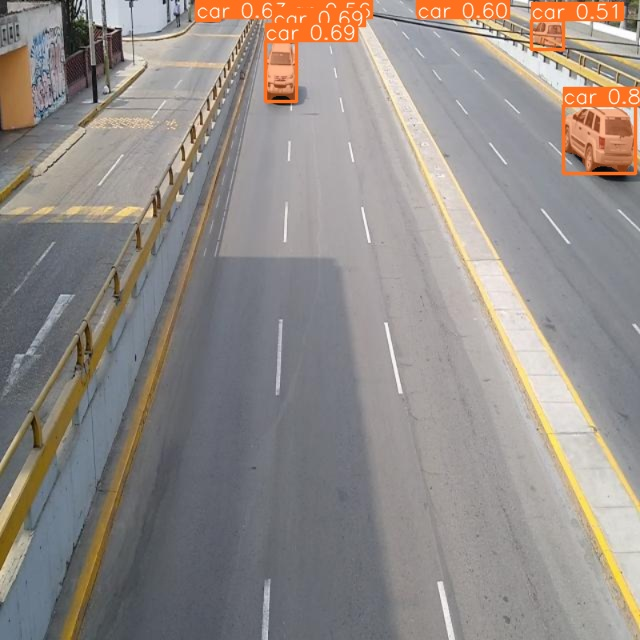

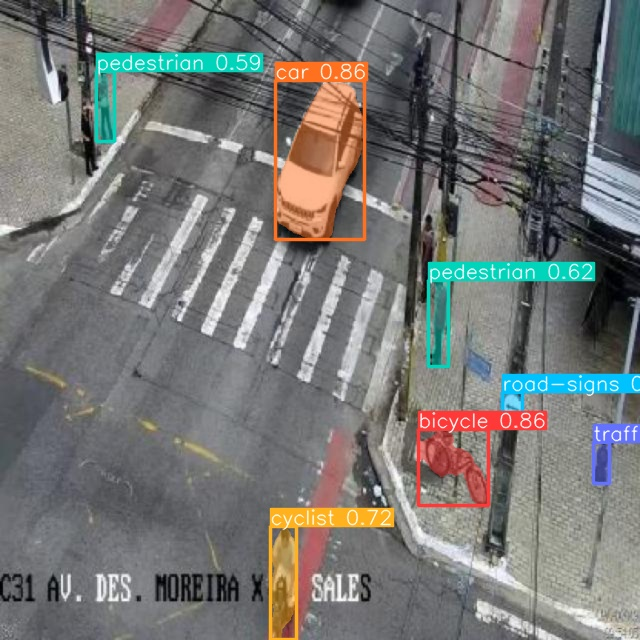

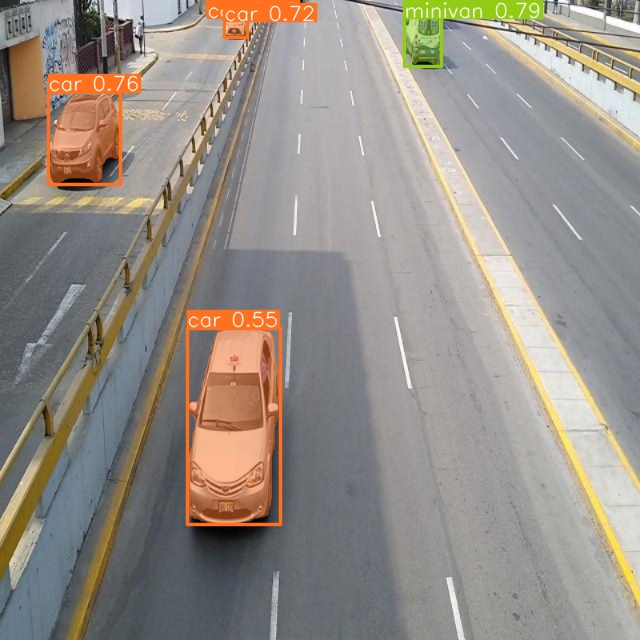

In [26]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [30]:
project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.
